___
# HW: More Details on Classification

Because we have a holliday this week, I made this HW very straightforward. The goal is for you to see how to do classification in more depth, in case you want to use it in your final project. I noticed that a lot of the datasets you used for the midterm project are great for classification problems. 

Whether you use in this in your project or not, this HW illustrates an extremely important aspect of classification. What you will see is that, despite some naive similarities, classification is quite different from regression in practice.

Again, you'll use the iris dataset since you now have a lot of intuition for it. 

Because this is a holiday week, I want this to be short. What I have done is written the entire code for you. All you need to do is read the notebook, answer some questions and comment the code. 

One comment before we dive into the code. The iris dataset is known to be "easy". If we use these powerful ML models on the complete dataset, we often get a perfect prediction. For this reason, I grab only the first two columns in line 11. Change this to use 3 or 4 columns, and compare the scores you get; this is a very nice ML lesson. 












____

## Step 1: Get Data

In [71]:
# comment every line, unless it is very obvious (e.g., NumPy)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris_data = datasets.load_iris() # data load
X = iris_data.data[:, :2] # what is happening here? Ans - We are selecting the first two columns from iris dataset
y = iris_data.target # selecting Y (dependent) variable


____
## Step 2: Preprocess Data

What is being done here has a small subtlety. In line 8, a scaler is instantiated (created for use), but it isn't used until line 9. In line 9, the scaler only learns from the data how to do the scaling - *it doesn't actually do the scaling!* 

Why? This is so that you can use that information to scale anything you want using the rules it learned. For example, we learn the scaling from the training data (line 9), but we scale **both** the training and test in lines 11 and 13. 

Can you think of why we would do this? The reason is that in the real world we would only have the training data - we cannot learn how to scale the data from data we have never seen. But, once we learn a good scaling and train our ML models using that rule, we should apply it to future data, which could be our test data or real world data once the ML is deployed. 

In [73]:
# comment every line in detail

start_state = 42 # choosing state for same output
test_fraction = 0.2 # to split the data in train and test set

# using train_test_split we are splitting our data into train 80% and test 20% dataset. And X and y contains independent and dependent variable respectively   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_fraction, random_state=start_state) 


my_scaler = StandardScaler() # initiating standardScaler object as my_scaler
# fitting scaler to our training data
my_scaler.fit(X_train) # why isn't y_train used here? Ans - Because y_train is the dependent variable (output prediction) and hence it never requires scaling.
X_train_scaled = my_scaler.transform(X_train) # scaling performed on X_train
X_test_scaled = my_scaler.transform(X_test) # scaling performed on X_test

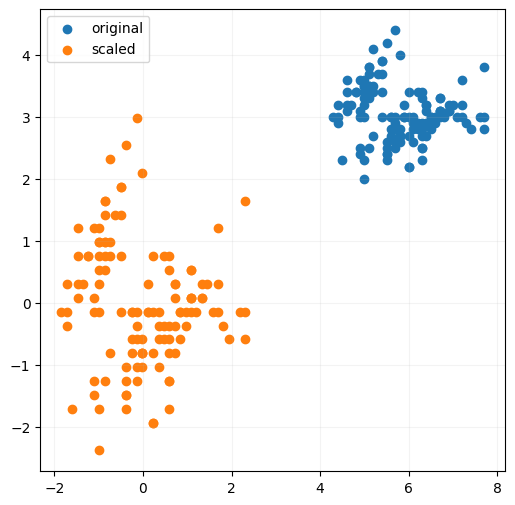

In [74]:
# comment non-obvious lines

plt.figure(figsize=(6,6)) # initiating figure
plt.scatter(X_train[:,0], X_train[:,1], label='original') # Scatter plot of first and second column of original non scaled data
plt.scatter(X_train_scaled[:,0], X_train_scaled[:,1], label='scaled') # Scatter plot of first and second column of scaled data
plt.grid(alpha=0.15) # adding grid lines
plt.legend() # adding legend

____
## Step 3: Learn!

I don't usually like putting import statements down here, but I wanted to group them away from the others above. 

What I really want you to see is that the estimator could be anything - here, I use two and most of the code is totally unchanged! Add as many classifiers as you want - run them all! 

In [75]:
# switch between the classifiers and rerun the code

from sklearn.tree import DecisionTreeClassifier
my_classifier1 = DecisionTreeClassifier(criterion='gini', random_state=0) # using decision tree algorithm as the classifier with gini index as our splitting criteria

from sklearn import neighbors 
n_neighbors = 2 # defining number of neighbours we want for the KNN
my_classifier2 = neighbors.KNeighborsClassifier(n_neighbors) # initiating classifier

# importing bunch of classifiers
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



In [76]:
# initiating classifiers for comparision 
my_classifier3 = SVC(kernel="linear",random_state=0)
my_classifier4 = SVC(gamma=2,random_state=0)
my_classifier5 = GaussianProcessClassifier(random_state=0)
my_classifier6 = RandomForestClassifier(random_state=0)
my_classifier7 = MLPClassifier(alpha=1, max_iter=1000,random_state=0)
my_classifier8 = AdaBoostClassifier(random_state=0)
my_classifier9 = GaussianNB()
my_classifier10 = QuadraticDiscriminantAnalysis()

In [78]:
# note that this code doesn't care which estimator you chose

my_model1 = my_classifier1.fit(X_train_scaled, y_train) # fitting decision tree classifier in our scalled dataset

my_model1.score(X_test_scaled, y_test) # calculating the score of our model

0.6333333333333333

In [ ]:
# my_model1 = my_classifier1.fit(X_train, y_train) # fitting decision tree classifier on our non scalled dataset

# my_model1.score(X_test, y_test) # calculating the score of our model

In [79]:
my_model2 = my_classifier2.fit(X_train_scaled, y_train)

my_model2.score(X_test_scaled, y_test)

0.7

In [80]:
my_model3 = my_classifier3.fit(X_train_scaled, y_train)

my_model3.score(X_test_scaled, y_test)

0.9

In [81]:
my_model4 = my_classifier4.fit(X_train_scaled, y_train)

my_model4.score(X_test_scaled, y_test)

0.8666666666666667

In [82]:
my_model5 = my_classifier5.fit(X_train_scaled, y_train)

my_model5.score(X_test_scaled, y_test)

0.9

In [83]:
my_model6 = my_classifier6.fit(X_train_scaled, y_train)

my_model6.score(X_test_scaled, y_test)

0.8

In [84]:
my_model7 = my_classifier7.fit(X_train_scaled, y_train)

my_model7.score(X_test_scaled, y_test)

0.9

In [85]:
my_model8 = my_classifier8.fit(X_train_scaled, y_train)

my_model8.score(X_test_scaled, y_test)

0.6333333333333333

In [86]:
my_model9 = my_classifier9.fit(X_train_scaled, y_train)

my_model9.score(X_test_scaled, y_test)

0.9

In [87]:
my_model10 = my_classifier10.fit(X_train_scaled, y_train)

my_model10.score(X_test_scaled, y_test)

0.9

With everything trained, you can deploy the model and make predictions. All you need to do is pass in an $X$ and the model will return a $y$. Let's try this with the test data. Try it with your own input.

In [36]:
y_pred = my_model1.predict(X_test_scaled) # Predicting using our model

In [37]:
y_pred10 = my_model10.predict(X_test_scaled)

In [38]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

At this point, you should go back and play with the number of columns and the scaling. If you use 3 columns does the score go up or down? What if you comment out the code that scales the data - does that impact the score? 

**Answer**
* Adding one more column for analysing increased the classifying accuracy of our model, while adding all columns gave us a perfect classification score of 1, but that might not always be the case if we are overfitting our model with excess of data. 
* In iris dataset scaling the columns produced different effects with different algorithms, some cases performed similar to scaled dataset, some performed worse and some performed better. However, as Iris dataset is a curated data, we might not often find the same case in real life dataset. Thus, scaling in general is beneficial to avoid biasnes.  

____
____
## Step 4:  The Interesting Part!!

Everything above is pretty straightforward. If you were doing, say, regression, nearly everything would be identical once you swapped regression estimators for the classifiers. 

Now, I want to introduce you to a very important metric that is _used for classification specifically_. This metric is called the confusion matrix. 

Let's bring the code in. (Again, I would normally put this at the top...)


In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

You might have heard of a confusion matrix before. If not, you have certainly heard of "false positives" and "false negatives" - we use that terminology in our everyday speech. [Read this to review/learn the basic ideas.](https://en.wikipedia.org/wiki/Confusion_matrix) 

The [code](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix) is simple:

In [98]:
conf_mat = confusion_matrix(y_test, y_pred) # creating confusion matrix from our actual and predicted value

In [99]:
print(conf_mat) # printing out

[[9 1 0]
 [0 4 5]
 [0 5 6]]


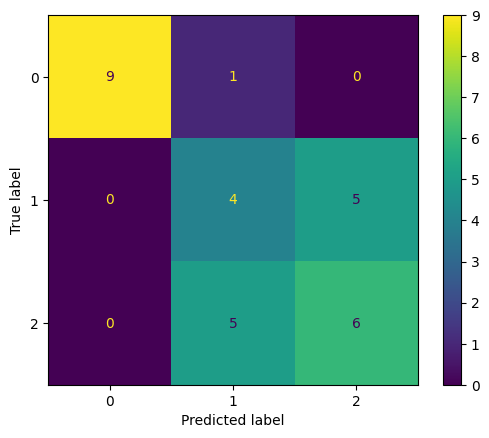

In [100]:
ConfusionMatrixDisplay.from_estimator(my_classifier1, X_test_scaled, y_test) # displaying confusion matrix of our test data prediction

In a markdown cell, describe what this displays. Interpret its meaning in terms of FPs, FNs, etc. Change things (number of columns, estimator) to see how the confusion matrix is impacted. 

If you do classification for your final project, you probably want to include this! It tells you how well your classifier is working; and, it tells **how** it fails when it does. 

**Answer**

* The confusion matrix above displays the accuracy of the actual label in our dataset vs the predicted label by the classifier.
* The main diagonal values in the matrix represents the True positives, i.e. our model predicted the right label for those cases
* The values other than main diagonal can be termed as false positive and false negative. These are the cases where our model failed to classify correctly with the actual value
* If we increase number of columns our confusion matrix have more values in the main diagonal, as the accuracy increases of our model. False positive and false negative also decreases. 
* Changing estimator also changes the confusion matrix but major impacts on accuracy is only observed when number of columns are increased